In [46]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
%matplotlib inline

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [9]:
#сгенерируем данные
test_data = []
for i in range(49):
    test_data.append(0)
test_data.append(1)
test_data = np.array(test_data)

In [42]:
normal_interval = proportion_confint(sum(test_data), len(test_data), method = 'normal')
print('Доверительный интервал на основе нормального распределения:', normal_interval)
print('нижняя граница:',normal_interval[0])

Доверительный интервал на основе нормального распределения: (0.0, 0.05880530708179099)
нижняя граница: 0.0


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [25]:
wilson_interval = proportion_confint(sum(test_data), len(test_data), method = 'wilson')
print('интервал Уилсона', wilson_interval)
print('нижняя граница:',round(wilson_interval[0],4))

интервал Уилсона (0.003539259271646236, 0.10495443589637815)
нижняя граница: 0.0035


Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [41]:
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

753

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра $p$. Посмотрите, при каком значении pp нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком $p$, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [58]:
size = []
ps = []
xs = np.linspace(0, 1, 100000)
for p in xs:
    ps.append(ceil(samplesize_confint_proportion(p, 0.01, method='normal', alpha = 0.05)))

Text(0, 0.5, 'num of samples')

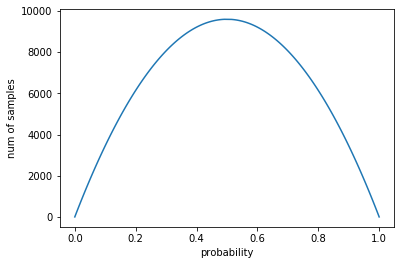

In [64]:
plt.plot(xs, ps)
plt.xlabel('probability')
plt.ylabel('num of samples')

In [62]:
sorted(ps, reverse = True)[0]

9604